<a href="https://colab.research.google.com/github/malarkeyfrancis/geeks_for_geeks_ML_exercises/blob/main/healthcare/disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goal: create a robust ML model to efficiently predict the disease of human based on symptoms presented.

Approach:
* Gather the data
* Clean the data
* Build the Model
* Inference

See the image below for our implementation

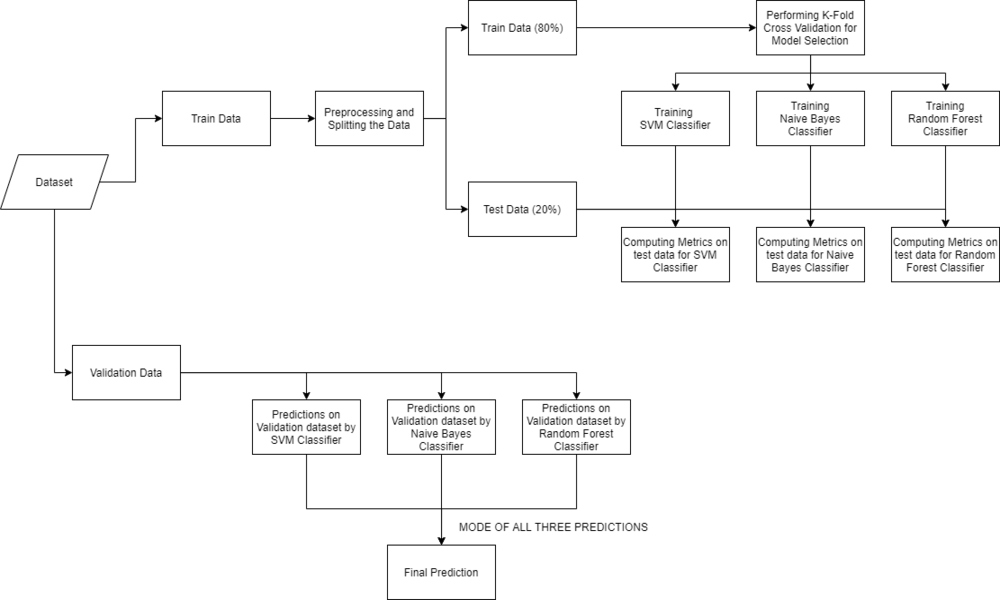

In [2]:
# Step 1: Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

# Reading the dataset

1. make sure the datasets are downloaded and saved
2. Load the dataset using the pandas library
3. Check columns for nulls
4. Check the stat type for each column in the dataset and note for later
5. Create a bar plot

In [12]:
# read the training dataset

data = pd.read_csv('Training.csv')

# Check the contents of the dataset to determine balance
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


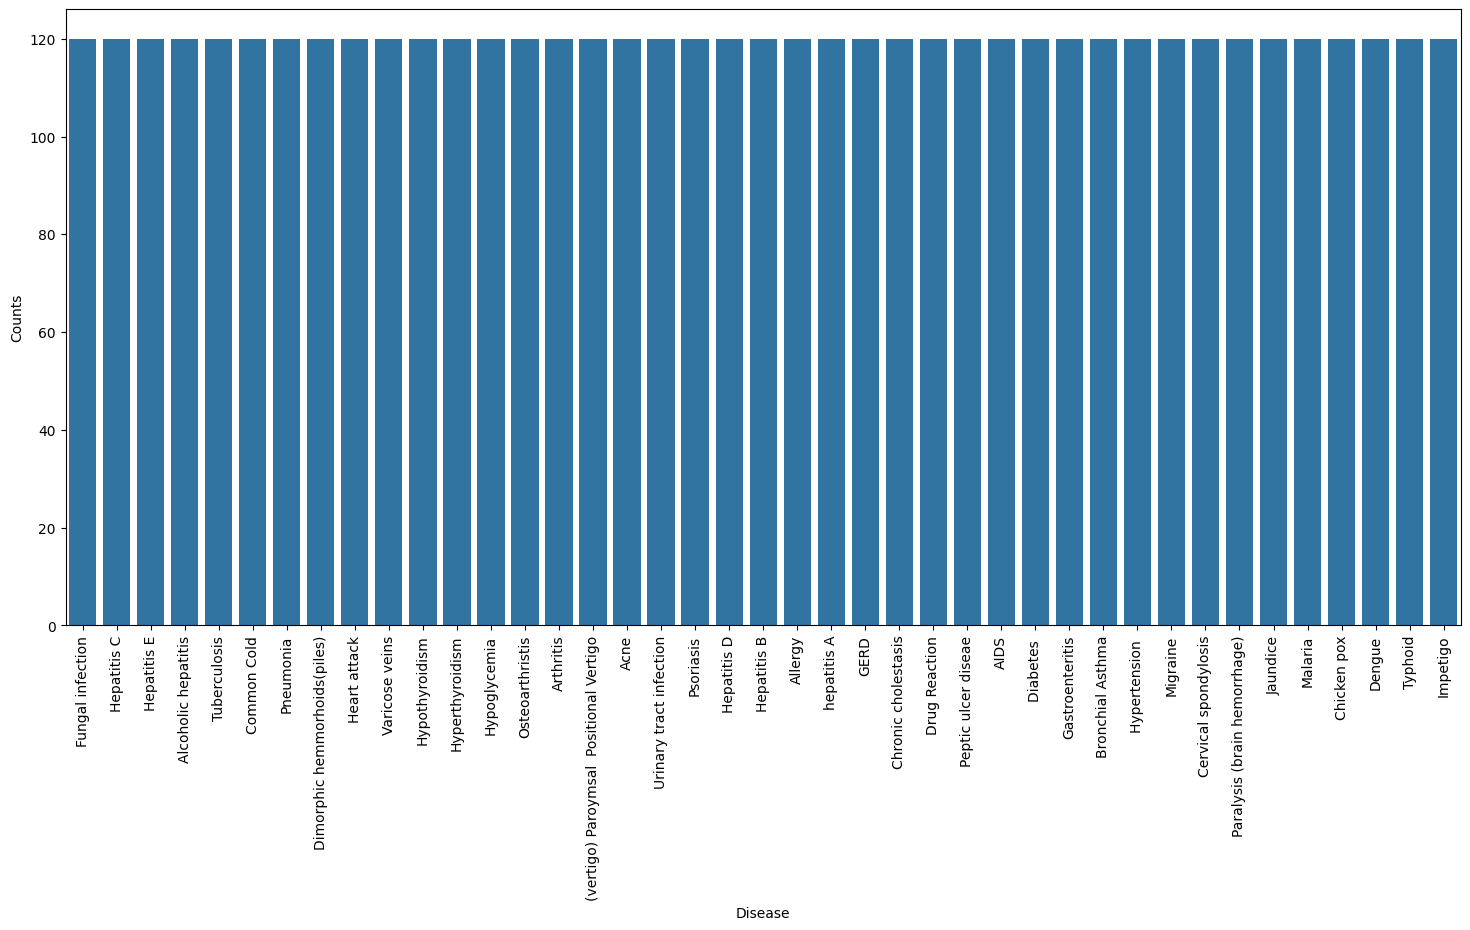

In [11]:
# Create a bar plot to check if data is evenly distributed
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

plt.figure(figsize= (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

# Good News!

The dataset is balanced with 120 entries for each disease and no further balancing is required.

# Bad News...

Prognosis is not a numerical datatype, it will need to be recoded for our use.

In [13]:
# Encoding is used to take a categorical value and turn it into a numerical
# In this case we are going to take Prognosis and turn it numerical
# using the function LabelEncoder

encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

First before we begin creating our ML algoritim we are going to need to remove that NaN column sitting at the back of the dataset. Then we are going to need to split our data into training and testing datasets

In [20]:
# Remove the last column from the dataframe (I had to remove two?)
X = data.iloc[:,:-2]
y = data.iloc[:, -2]

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=24)

print(f"Shape of Train: {X_train.shape}, {y_train.shape}")
print(f"Shape of Test: {X_test.shape}, {y_test.shape}")


Shape of X: (4920, 132)
Shape of y: (4920,)
Shape of Train: (3936, 132), (3936,)
Shape of Test: (984, 132), (984,)


# Model Building

We are going to use the K-Fold cross-validation to evaluate our model. We are going to use 3 different cross-validators: Support Vector Classifier, Gaussian Naive Bayes Classifier, and Random Forest Classfier.

# What is K-Fold cross-validation?
Where the whole dataset is split in to k number of subsets (aka folds). We train on k-1 subsets, and use the final one to evaluate.

# What is Support Vector Classification?
A discriminative classifier, it tries to find an optimal hyperplane to separate samples into different categories. In simple terms, it is a boundary that separates a space into two parts. In two dimensions, a hyperplane is a line. In three dimensions, it is a plane. Think of this like the surface of water, where everything above is dry, and everything below is wet.

# What is Gaussian Naive Bayes Classifier?
A probabalistic ML algorithm that uses the Bayes Theorem. [The Bayes Theorem is a mathematical rule for inverting conditional probabilities, allowing one to find the probability of a cause given its effect.](https://en.wikipedia.org/wiki/Bayes%27_theorem)

# What is Random Forest Classifier?
An ensemble supervised learning (requires correct answers from developer) that uses decision trees to to make a classification (sometimes multiple).

# ***LETS BUILD OUR MODELS***

In [21]:
# Define the scoring metrics for the k-fold cross validation
def cv_scoring(estimator, X, y):
  return accuracy_score(y, estimator.predict(X))

# Create your models, SVC, Gaussian NB, and Random Forest
models = {
    "SVC": SVC(),
    "Gaussian NB": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=18)
}

for model_name in models:
  model = models[model_name]
  scores = cross_val_score(model, X, y, cv=10,
                           n_jobs = -1,
                           scoring=cv_scoring)
  print("=="*30)
  print(model_name)
  print(f"Scores: {scores}")
  print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Each one of our models is working pretty well. However there is a chance that one of them could make a wrong prediction. To prevent that, we can bundle these models together and take the mode of the predictions (most common prediction in the group)

This helps keep us much more accurate on unseen data.

Accuracy on train data by SVM Classifier: 100.0%
Accuracy on test data by SVM Classifier: 100.0%


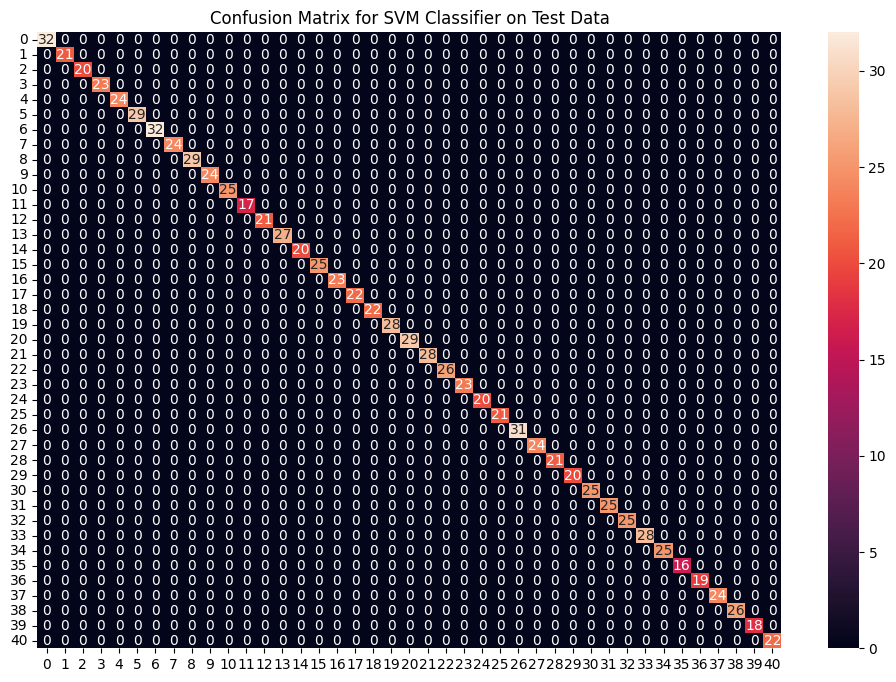

Accuracy on train data by NB Classifier: 100.0%
Accuracy on test data by NB Classifier: 100.0%


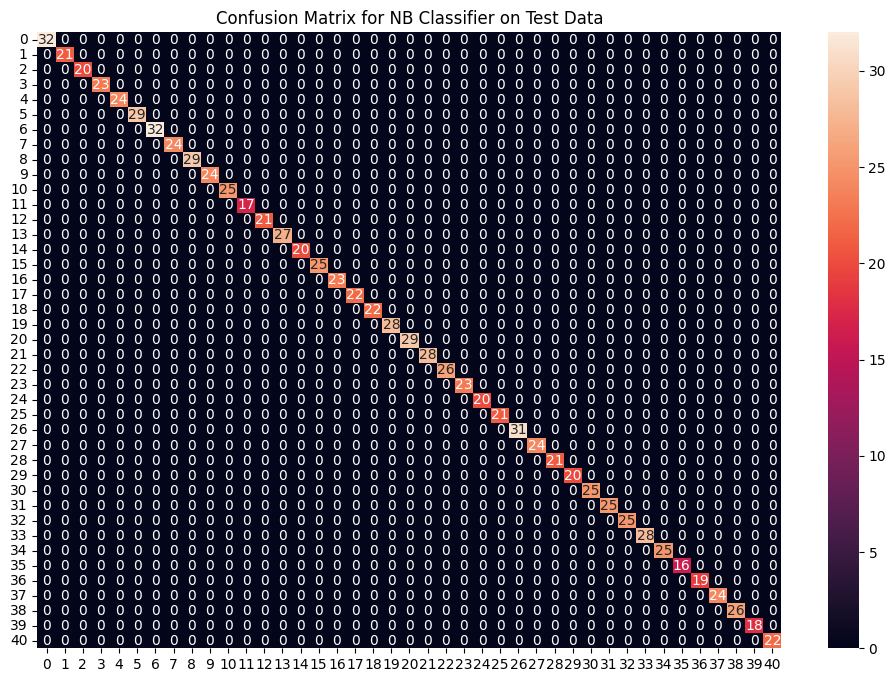

Accuracy on train data by RF Classifier: 100.0%
Accuracy on test data by RF Classifier: 100.0%


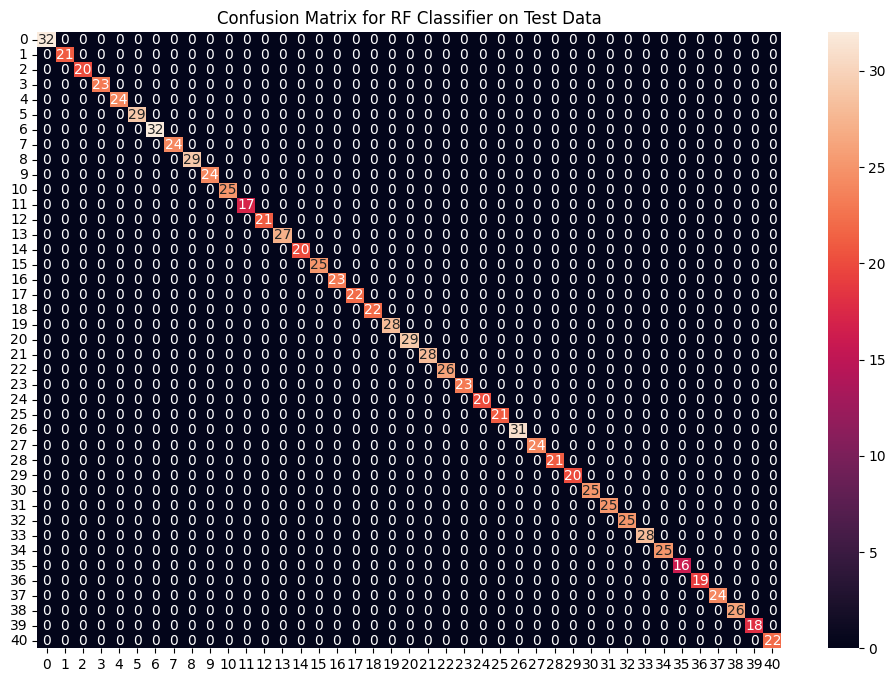

In [26]:
# Building a Robust Classifier model

# Training and testing SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier: {accuracy_score(y_train, svm_model.predict(X_train))*100}%")
print(f"Accuracy on test data by SVM Classifier: {accuracy_score(y_test,preds)*100}%")

# Build a confusion matrix
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

# Training and testing NB Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)

print(f"Accuracy on train data by NB Classifier: {accuracy_score(y_train, nb_model.predict(X_train))*100}%")
print(f"Accuracy on test data by NB Classifier: {accuracy_score(y_test,preds)*100}%")

# Build a confusion matrix
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for NB Classifier on Test Data")
plt.show()

# Training and testing RF Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)

print(f"Accuracy on train data by RF Classifier: {accuracy_score(y_train, rf_model.predict(X_train))*100}%")
print(f"Accuracy on test data by RF Classifier: {accuracy_score(y_test,preds)*100}%")


# Build a confusion matrix
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for RF Classifier on Test Data")
plt.show()


Our Cofusion Matrices look good! Now we can try to train on the whole data, and test the combined model on everything in the test dataset

Accuracy on test dataset by combined models: 100.0


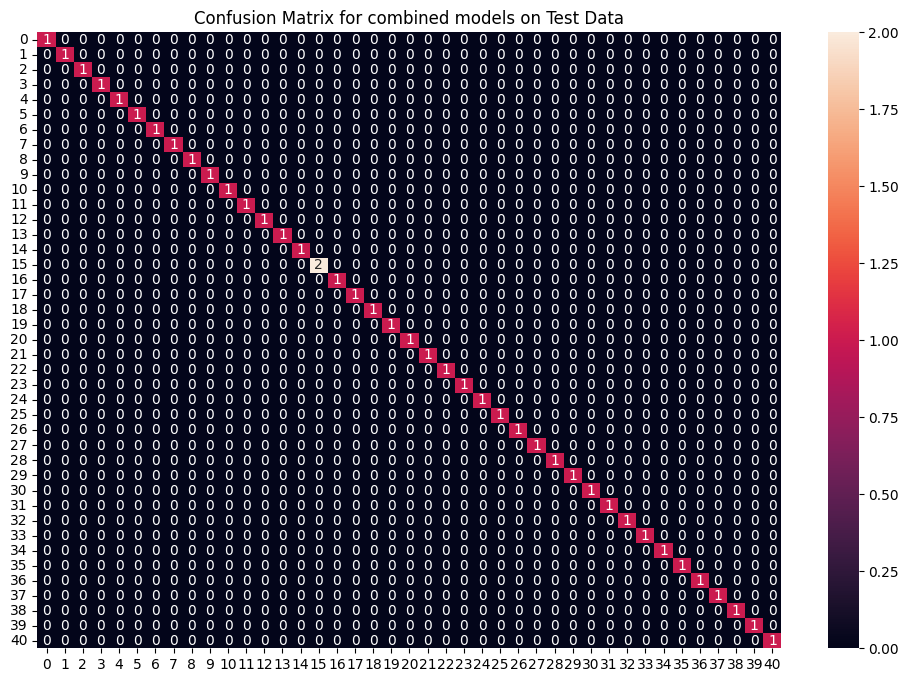

In [27]:
# Train your SVM, NB, and RF models on the whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)

final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

# Read in your test data

test_data = pd.read_csv('Testing.csv').dropna(axis=1)
# I forgot to add this drop to the previous read in
# thats why I had to drop two columns in my cleaning

test_X = test_data.iloc[:, :-1]
test_y = encoder.transform(test_data.iloc[:, -1])
# Here we take the encoder step for Prognosis and
# combine with our data cleaning

svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

from scipy import stats

final_preds = [stats.mode([i,j,k])[0] for i,j,k in zip(svm_preds, nb_preds, rf_preds)]

print(f"Accuracy on test dataset by combined models: {accuracy_score(test_y, final_preds)*100}")

cf_matrix = confusion_matrix(test_y, final_preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for combined models on Test Data")
plt.show()